In [23]:
import pandas as pd

In [24]:
df = pd.read_csv("box_office_success_2015_2024_Updated.csv")
df.head()
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         578 non-null    object 
 1   year                          578 non-null    int64  
 2   original_release_date_parsed  578 non-null    object 
 3   domestic_gross                578 non-null    int64  
 4   international_gross           578 non-null    int64  
 5   worldwide_gross               578 non-null    int64  
 6   production_budget             578 non-null    float64
 7   profit_proxy                  578 non-null    float64
 8   roi_proxy                     578 non-null    float64
 9   tomatometer_rating            577 non-null    float64
 10  tomatometer_count             577 non-null    float64
 11  genres                        578 non-null    object 
 12  runtime                       573 non-null    float64
 13  direc

,title,year,original_release_date_parsed,domestic_gross,international_gross,worldwide_gross,production_budget,profit_proxy,roi_proxy,tomatometer_rating,...,lead_actor_has_oscar,lead_actor_tier,lead_actor_status,star_power_score,is_animated,is_live_action,is_franchise,is_sequel,is_standalone,lead_actor_clean
count,578,578.000000,578,5.780000e+02,5.780000e+02,5.780000e+02,5.780000e+02,5.780000e+02,578.000000,577.000000,...,578.000000,576,576,576.000000,578.000000,578.000000,578.000000,578.000000,578.000000,576
unique,578,NaN,297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,573
top,Star Wars: Episode VII - The Force Awakens,NaN,2017-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,C,well_known,NaN,NaN,NaN,NaN,NaN,NaN,jessica rothe israel broussard rachel lynn mat...
freq,1,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,402,349,NaN,NaN,NaN,NaN,NaN,NaN,2
mean,NaN,2017.015571,NaN,8.498754e+07,1.411948e+08,2.261823e+08,5.932378e+07,1.668585e+08,5.359956,58.147314,...,0.001730,NaN,NaN,35.255690,0.117647,0.882353,0.031142,0.079585,0.894464,NaN
std,NaN,1.502661,NaN,1.151456e+08,2.153719e+08,3.197192e+08,8.730457e+07,2.742739e+08,19.690462,26.988889,...,0.041595,NaN,NaN,20.275352,0.322469,0.322469,0.173851,0.270884,0.307509,NaN
min,NaN,2015.000000,NaN,0.000000e+00,0.000000e+00,4.890505e+06,1.000000e+05,-1.349154e+08,-0.880208,4.000000,...,0.000000,NaN,NaN,0.122164,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2016.000000,NaN,2.234622e+07,2.068550e+07,4.516198e+07,1.552500e+07,2.278050e+07,0.865970,35.000000,...,0.000000,NaN,NaN,17.805410,0.000000,1.000000,0.000000,0.000000,1.000000,NaN
50%,NaN,2017.000000,NaN,4.533095e+07,5.275000e+07,9.933297e+07,3.200000e+07,6.327176e+07,2.498905,61.000000,...,0.000000,NaN,NaN,35.366492,0.000000,1.000000,0.000000,0.000000,1.000000,NaN
75%,NaN,2018.000000,NaN,9.981478e+07,1.669824e+08,2.504543e+08,7.500000e+07,1.840824e+08,5.038968,83.000000,...,0.000000,NaN,NaN,52.683246,0.000000,1.000000,0.000000,0.000000,1.000000,NaN


In [25]:
import numpy as np

Next few steps will help clean the data from inconsistencies found above like filling in missing values, assigning appropriate data types, normalizing or generating label encodings

In [26]:
df['original_release_date_parsed'] = pd.to_datetime(df['original_release_date_parsed'], errors='coerce')

In [27]:
df['original_release_date_parsed'].head()

0   2015-12-18
1   2015-06-12
2   2015-04-03
3   2015-05-01
4   2015-07-10
Name: original_release_date_parsed, dtype: datetime64[ns]

Helps normalize categorical data to be all lowercase and removes inconsistencies with spacing.

In [28]:
category_colms = ['genres', 'directors', 'lead_actor',
                  'lead_actor_clean', 'lead_actor_tier',
                  'lead_actor_status'
                 ]

for col in category_colms:
    df[col] = df[col].astype(str).str.lower().str.strip()

In [29]:
df['lead_actor_clean'].head()

0    daisy ridley john boyega harrison ford oscar i...
1    chris pratt bryce dallas howard irrfan khan vi...
2    vin diesel paul walker dwayne johnson michelle...
3    robert downey jr. chris hemsworth mark ruffalo...
4    sandra bullock jon hamm michael keaton allison...
Name: lead_actor_clean, dtype: object

Now we will tackle all numerically missing values to be updated with their median value

In [30]:
num_cols = ['tomatometer_rating', 
           'tomatometer_count',
           'runtime',
           'star_power_score']

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [31]:
for col in num_cols:
    print(df[col].name, ": ", df[col].isnull().any())

tomatometer_rating :  False
tomatometer_count :  False
runtime :  False
star_power_score :  False


In [32]:
cat_cols = ['lead_actor',
            'lead_actor_clean', 
            'lead_actor_tier',
            'lead_actor_status']

for col in cat_cols:
        df[col] = df[col].fillna("unknown")

In [41]:
temp = df[df['production_budget'] < 5_000_000_000]
max_budget = temp['production_budget'].max()
print('Production Budget Max: ', max_budget)

min_budget = temp['production_budget'].min()
print('Production Budget Min: ', min_budget)

Production Budget Max:  1500000000.0
Production Budget Min:  100000.0


In [39]:
temp2 = df[df['runtime'] < 250]
max_runtime = temp2[['runtime']].max()
print('Runtime (max): ', max_runtime)

min_runtime = temp2[['runtime']].min()
print('Runtime (min): ', min_runtime)

Runtime (max):  runtime    181.0
dtype: float64
Runtime (min):  runtime    77.0
dtype: float64


based on above pre-processing steps, the runtime min and max values seem to be in the correct range. However, the production budget of 1.5 billion dollars may be incorrect and an outlier. This is because the highest production budget recorded in history has been 500 million dollars so we need to process the data accordingly.

In [43]:
temp3 = df[df['worldwide_gross'] < 5_000_000_000]
max_wwg = temp3['worldwide_gross'].max()
print('worldwide_gross Max: ', max_budget)

min_wwg = temp['worldwide_gross'].min()
print('worldwide_gross Min: ', min_budget)

worldwide_gross Max:  1500000000.0
worldwide_gross Min:  100000.0


cleaning up all the outlier, incorrect, missing or duplicated values 

In [44]:
df = df[df['production_budget'] > 0]
df = df[df['worldwide_gross'] > 0]

df = df[df['production_budget'] < 500_000_000]

df = df[df['worldwide_gross'] < 5_000_000_000]

df = df[df['runtime'] > 40]

df = df.drop_duplicates()
df = df.drop_duplicates(subset=['title', 'year'], keep='first')

df.loc[df['tomatometer_count'] == 0, 'tomatometer_count'] = np.nan
df['tomatometer_count'] = df['tomatometer_count'].fillna(df['tomatometer_count'].median())

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, 1 to 577
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   title                         576 non-null    object        
 1   year                          576 non-null    int64         
 2   original_release_date_parsed  576 non-null    datetime64[ns]
 3   domestic_gross                576 non-null    int64         
 4   international_gross           576 non-null    int64         
 5   worldwide_gross               576 non-null    int64         
 6   production_budget             576 non-null    float64       
 7   profit_proxy                  576 non-null    float64       
 8   roi_proxy                     576 non-null    float64       
 9   tomatometer_rating            576 non-null    float64       
 10  tomatometer_count             576 non-null    float64       
 11  genres                        576 non

In [105]:
# storing genres in a clean split
df['genres']= df['genres'].astype(str).str.lower().str.strip()

In [106]:
df['genre_list'] = df['genres'].str.split(',')

In [119]:
df['genre_list'].iloc[0]

['action & adventure', 'mystery & suspense', 'science fiction & fantasy']

primary genre is taken as the first item becuase most online sources confirm that almost all metadata produced by studios seems to reflect this truth.

In [68]:
#now storing primary genre
df['primary_genre'] = df['genre_list'].str[0]
df['primary_genre'] = df['primary_genre'].str.lower().str.strip()


In [69]:
df['primary_genre'].head()

1    action & adventure
2    action & adventure
3    action & adventure
4             animation
5    action & adventure
Name: primary_genre, dtype: object

In [71]:
#generating variance count for primary genres

genre_counts = df['primary_genre'].value_counts()
genre_counts

primary_genre
action & adventure           218
drama                        132
comedy                       107
horror                        45
animation                     37
mystery & suspense            19
art house & international      6
kids & family                  4
science fiction & fantasy      2
documentary                    2
romance                        1
western                        1
classics                       1
special interest               1
Name: count, dtype: int64

In [75]:
# rare counts threshold being used 
rare_genres = genre_counts[genre_counts < 10].index
rare_genres

Index(['art house & international', 'kids & family',
       'science fiction & fantasy', 'documentary', 'romance', 'western',
       'classics', 'special interest'],
      dtype='object', name='primary_genre')

In [76]:
# replacing rare genres with 'other' to normalize data
df['primary_genre'] = df['primary_genre'].replace(rare_genres, 'other')


In [77]:
genre_counts = df['primary_genre'].value_counts()
genre_counts

primary_genre
action & adventure    218
drama                 132
comedy                107
horror                 45
animation              37
mystery & suspense     19
other                  18
Name: count, dtype: int64

adding a binary flag for each genre 

In [120]:
from sklearn.preprocessing import MultiLabelBinarizer

binarizer = MultiLabelBinarizer()
binarizer_obj = pd.DataFrame(
    binarizer.fit_transform(df['genre_list']),
    columns=binarizer.classes_,
    index=df.index
)

df = pd.concat([df, binarizer_obj], axis=1)



In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, 1 to 577
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   title                         576 non-null    object        
 1   year                          576 non-null    int64         
 2   original_release_date_parsed  576 non-null    datetime64[ns]
 3   domestic_gross                576 non-null    int64         
 4   international_gross           576 non-null    int64         
 5   worldwide_gross               576 non-null    int64         
 6   production_budget             576 non-null    float64       
 7   profit_proxy                  576 non-null    float64       
 8   roi_proxy                     576 non-null    float64       
 9   tomatometer_rating            576 non-null    float64       
 10  tomatometer_count             576 non-null    float64       
 11  genres                        576 non

In [117]:
genre_dummy_cols = [
    'action & adventure', ' animation', ' anime & manga', ' art house & international',
    'classics', ' comedy', ' drama', 'documentary', ' horror', ' kids & family', 
    ' musical & performing arts', ' mystery & suspense', ' romance',
    ' science fiction & fantasy', ' special interest', ' sports & fitness',
    ' western'
]

df = df.drop(columns=[c for c in genre_dummy_cols if c in df.columns])


In [111]:
df['genre_list'].value_counts()

genre_list
[drama]                                                     78
[comedy]                                                    68
[action & adventure,  drama]                                29
[action & adventure,  drama,  science fiction & fantasy]    27
[horror]                                                    27
                                                            ..
[western]                                                    1
[action & adventure,  drama,  horror]                        1
[drama,  science fiction & fantasy,  romance]                1
[horror,  science fiction & fantasy,  western]               1
[comedy,  drama,  romance]                                   1
Name: count, Length: 92, dtype: int64

found issues with spacing in genre_list column so looping through to clean it and re-run labelizer

In [112]:
df['genre_list'] = df['genres'].str.lower().str.split(',')

df['genre_list'] = df['genre_list'].apply(
    lambda lst: [g.strip() for g in lst]
)

In [113]:
df['genre_list'].value_counts()

genre_list
[drama]                                                   78
[comedy]                                                  68
[action & adventure, drama]                               29
[action & adventure, drama, science fiction & fantasy]    27
[horror]                                                  27
                                                          ..
[western]                                                  1
[action & adventure, drama, horror]                        1
[drama, science fiction & fantasy, romance]                1
[horror, science fiction & fantasy, western]               1
[comedy, drama, romance]                                   1
Name: count, Length: 92, dtype: int64

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, 1 to 577
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   title                         576 non-null    object        
 1   year                          576 non-null    int64         
 2   original_release_date_parsed  576 non-null    datetime64[ns]
 3   domestic_gross                576 non-null    int64         
 4   international_gross           576 non-null    int64         
 5   worldwide_gross               576 non-null    int64         
 6   production_budget             576 non-null    float64       
 7   profit_proxy                  576 non-null    float64       
 8   roi_proxy                     576 non-null    float64       
 9   tomatometer_rating            576 non-null    float64       
 10  tomatometer_count             576 non-null    float64       
 11  genres                        576 non

finalizing some derived features and some more feature preparation for worldwide earnings and defining the classification labels. 

In [122]:
df['log_worldwide_gross'] = np.log1p(df['worldwide_gross'])

#re calculating proxy values
df['profit_proxy'] = df['worldwide_gross'] - df['production_budget']
df['roi_proxy'] = df['profit_proxy'] / df['production_budget']

is_hit is defined to be above the threshold of 1.5 because if a movie is earning 1.5 times its production budget we can claim it is earning some form of profit. This seems to be common threshold across kaggle and other movie revenue papers.

In [123]:
#classification label
df['is_hit'] = (df['roi_proxy'] > 1.5).astype(int)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, 1 to 577
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   title                         576 non-null    object        
 1   year                          576 non-null    int64         
 2   original_release_date_parsed  576 non-null    datetime64[ns]
 3   domestic_gross                576 non-null    int64         
 4   international_gross           576 non-null    int64         
 5   worldwide_gross               576 non-null    int64         
 6   production_budget             576 non-null    float64       
 7   profit_proxy                  576 non-null    float64       
 8   roi_proxy                     576 non-null    float64       
 9   tomatometer_rating            576 non-null    float64       
 10  tomatometer_count             576 non-null    float64       
 11  genres                        576 non

In [125]:
df.iloc[0]

title                                                              Jurassic World
year                                                                         2015
original_release_date_parsed                                  2015-06-12 00:00:00
domestic_gross                                                          652270625
international_gross                                                    1018130012
worldwide_gross                                                        1670400637
production_budget                                                     150000000.0
profit_proxy                                                         1520400637.0
roi_proxy                                                               10.136004
tomatometer_rating                                                           70.0
tomatometer_count                                                           351.0
genres                          action & adventure, mystery & suspense, scienc...
runtime         

defining what features to perform random forest classification upon

In [145]:
classification_features = [
    'production_budget',
    'tomatometer_rating',
    'tomatometer_count',
    'runtime',
    'star_power_score',
    'year',
    'primary_genre',
    'directors',
    'lead_actor_clean',
    'lead_actor_status',
    'lead_actor_tier'
]

next section will focus on understanding some relationships within data.

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation matrix between some handpicked columns from data to learn what factors are important to 
understand the movie industry and consumer dynamics. 

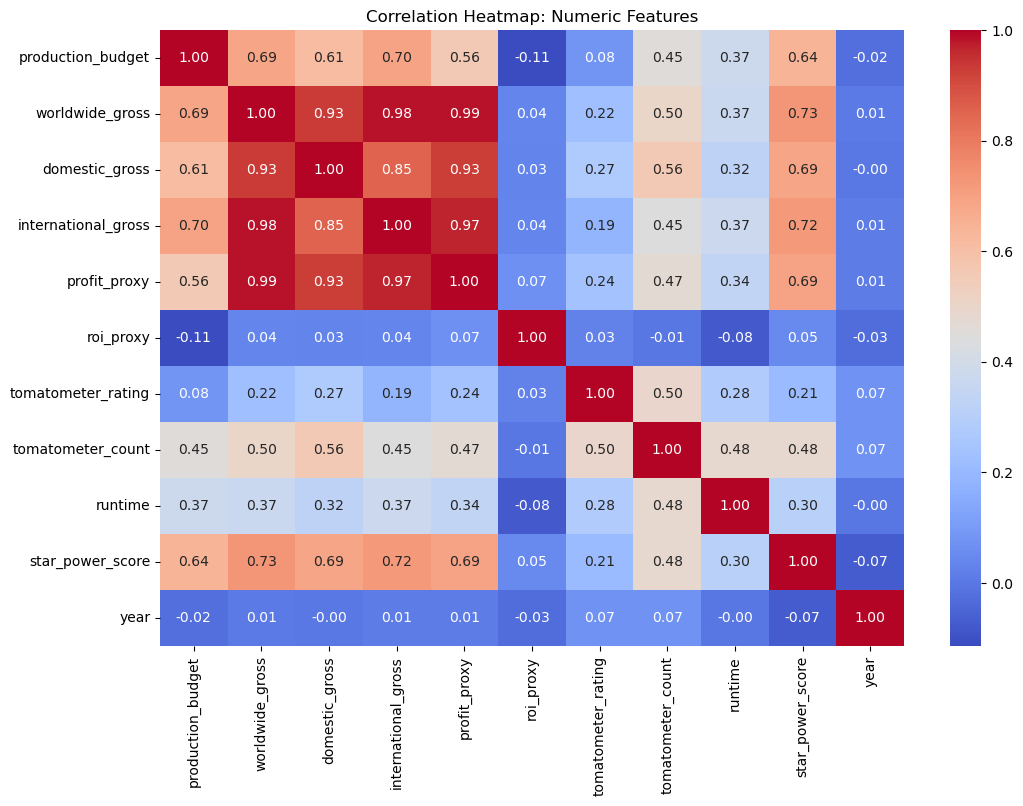

In [128]:
numeric_cols = [
    'production_budget', 'worldwide_gross', 'domestic_gross',
    'international_gross', 'profit_proxy', 'roi_proxy',
    'tomatometer_rating', 'tomatometer_count', 'runtime',
    'star_power_score', 'year'
]

plt.figure(figsize=(12, 8))
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Numeric Features")
plt.show()

we can check individual relationships to see if roi might be skewed?

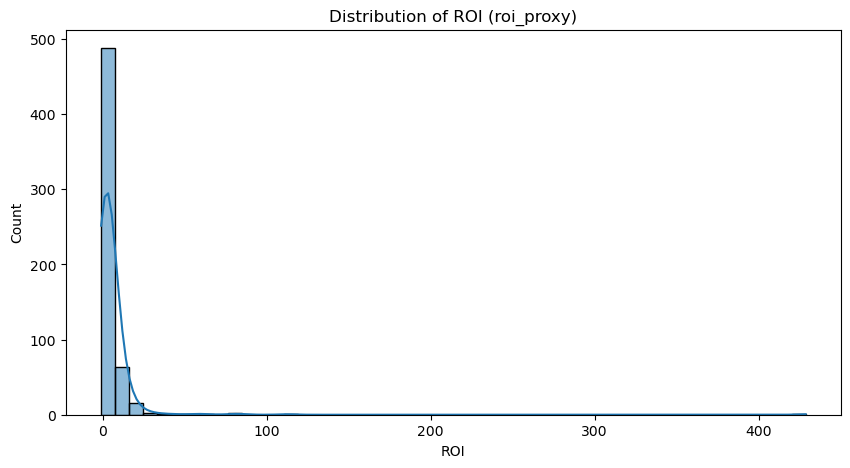

In [129]:
plt.figure(figsize=(10,5))
sns.histplot(df['roi_proxy'], bins=50, kde=True)
plt.title("Distribution of ROI (roi_proxy)")
plt.xlabel("ROI")
plt.ylabel("Count")
plt.show()

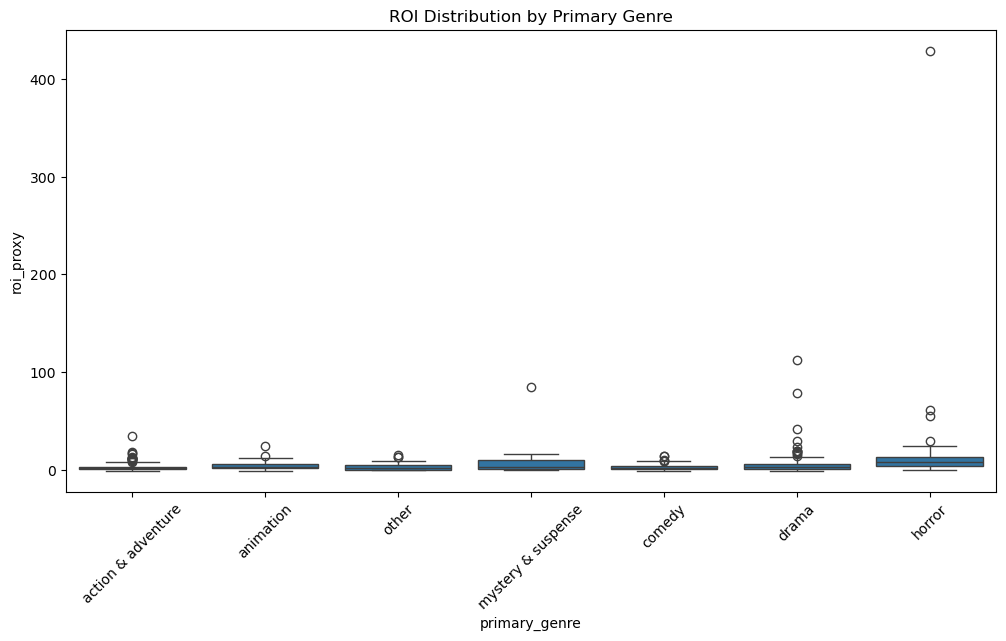

In [130]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='primary_genre', y='roi_proxy')
plt.xticks(rotation=45)
plt.title("ROI Distribution by Primary Genre")
plt.show()

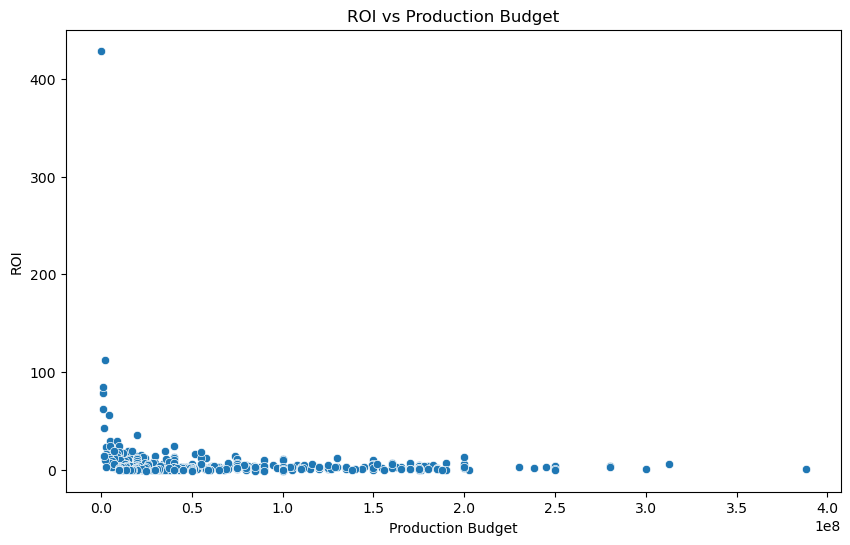

In [131]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='production_budget', y='roi_proxy')
plt.title("ROI vs Production Budget")
plt.xlabel("Production Budget")
plt.ylabel("ROI")
plt.show()

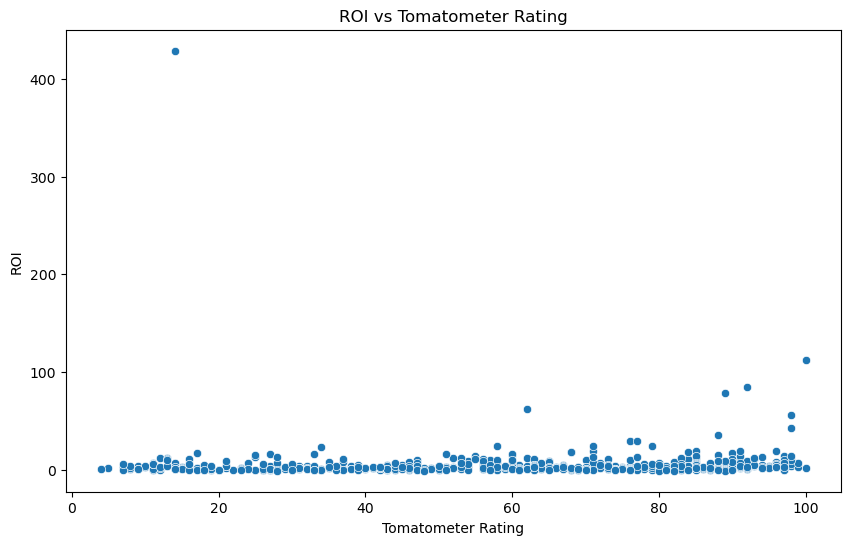

In [132]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='tomatometer_rating', y='roi_proxy')
plt.title("ROI vs Tomatometer Rating")
plt.xlabel("Tomatometer Rating")
plt.ylabel("ROI")
plt.show()

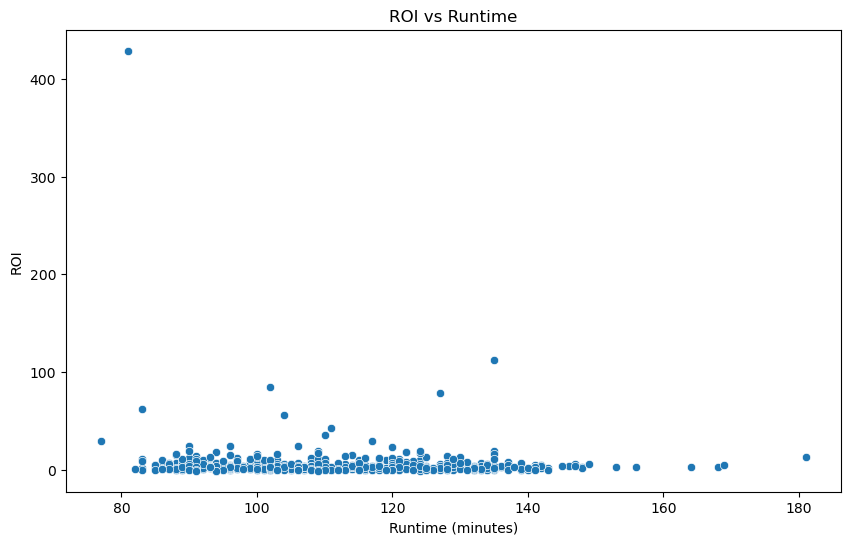

In [133]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='runtime', y='roi_proxy')
plt.title("ROI vs Runtime")
plt.xlabel("Runtime (minutes)")
plt.ylabel("ROI")
plt.show()

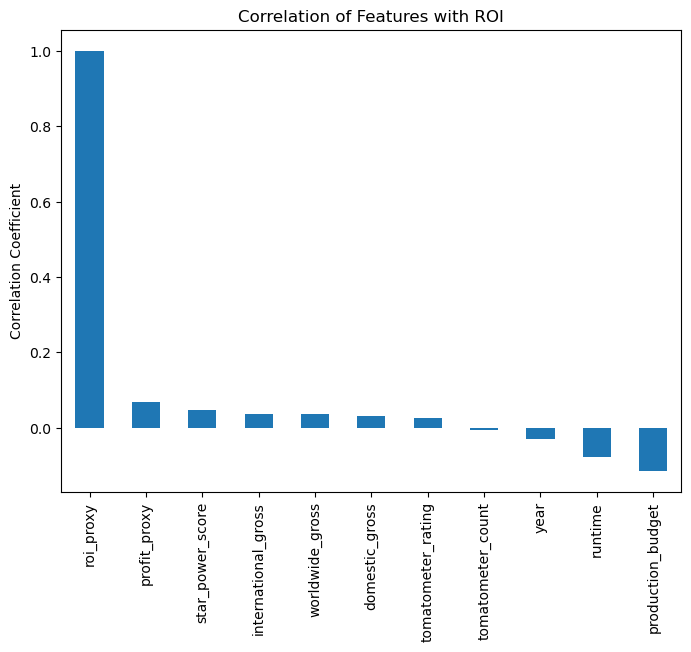

In [134]:
roi_corr = corr['roi_proxy'].sort_values(ascending=False)

plt.figure(figsize=(8,6))
roi_corr.plot(kind='bar')
plt.title("Correlation of Features with ROI")
plt.ylabel("Correlation Coefficient")
plt.show()

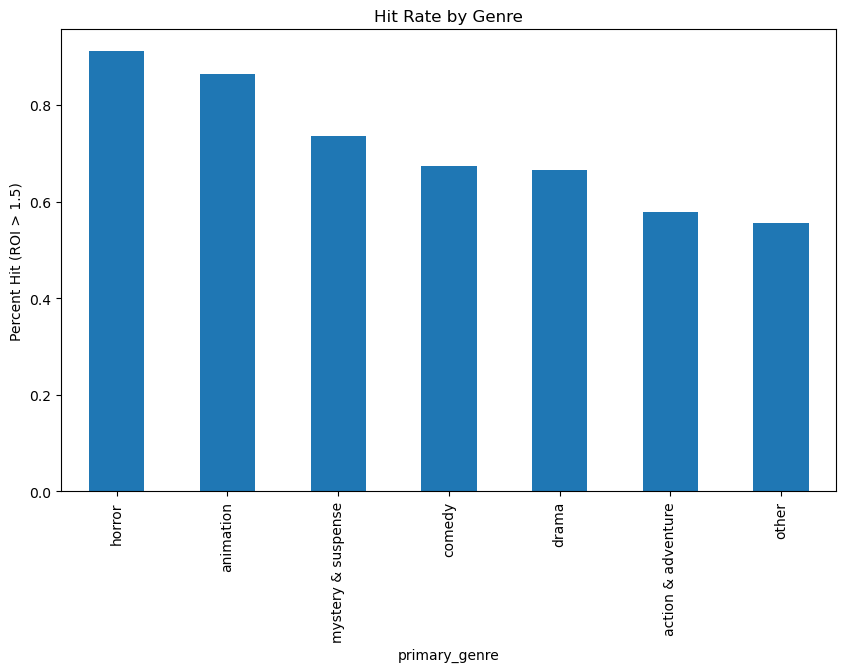

In [135]:
hit_rate = df.groupby('primary_genre')['is_hit'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
hit_rate.plot(kind='bar')
plt.title("Hit Rate by Genre")
plt.ylabel("Percent Hit (ROI > 1.5)")
plt.show()

<Axes: xlabel='production_budget', ylabel='roi_proxy'>

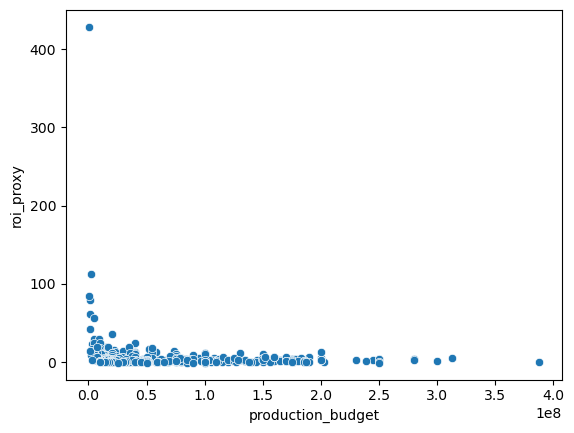

In [136]:
sns.scatterplot(x=df['production_budget'], y=df['roi_proxy'])

<Axes: xlabel='star_power_score', ylabel='roi_proxy'>

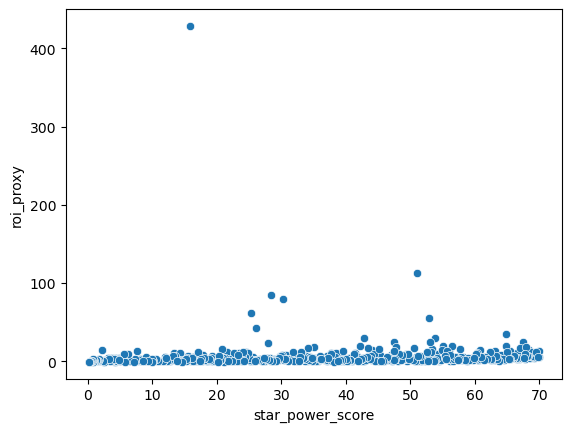

In [137]:
sns.scatterplot(x=df['star_power_score'], y=df['roi_proxy'])

<Axes: xlabel='star_power_score', ylabel='worldwide_gross'>

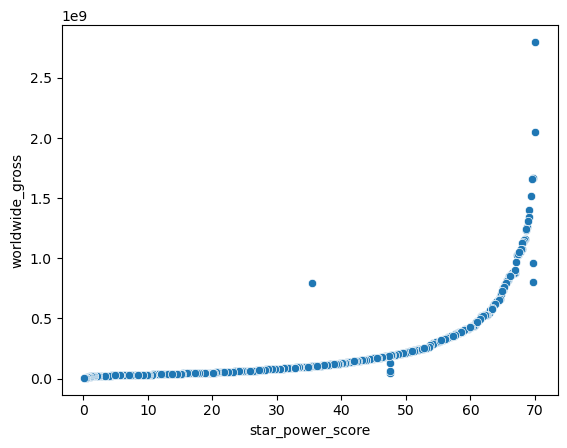

In [138]:
sns.scatterplot(x=df['star_power_score'], y=df['worldwide_gross'])

This section focuses on building the random forest classifier pipeline

In [139]:
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [140]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [147]:
X = df[classification_features]
Y = df['is_hit']


encoder_tier = LabelEncoder()
encoder_status = LabelEncoder()

X['lead_actor_tier'] = encoder_tier.fit_transform(X['lead_actor_tier'])
X['lead_actor_status'] = encoder_status.fit_transform(X['lead_actor_status'])

C:\Users\asb00\AppData\Local\Temp\ipykernel_27368\1994986712.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['lead_actor_tier'] = encoder_tier.fit_transform(X['lead_actor_tier'])
C:\Users\asb00\AppData\Local\Temp\ipykernel_27368\1994986712.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['lead_actor_status'] = encoder_status.fit_transform(X['lead_actor_status'])


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=y, test_size=0.25, random_state=42)


In [149]:
preprocess = ColumnTransformer(transformers=[
        ('genre_ohe', OneHotEncoder(handle_unknown='ignore'), ['primary_genre']),
        ('director_te', TargetEncoder(), ['directors']),
        ('actor_te', TargetEncoder(), ['lead_actor_clean'])
    ],
    remainder='passthrough'
)

In [150]:
model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('clf', RandomForestClassifier(
        n_estimators=500,
        max_depth=None,
        min_samples_split=5,
        random_state=42,
        class_weight='balanced'   # handles class imbalance
    ))
])

In [152]:
model.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('genre_ohe', ...), ('director_te', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [153]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

Next section focuses on the classification visualization and calcualting the accuracy and verification of the 
random forest classifier.

In [155]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [156]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.66      0.99      0.79        96

    accuracy                           0.66       144
   macro avg       0.33      0.49      0.40       144
weighted avg       0.44      0.66      0.53       144

Confusion Matrix:
[[ 0 48]
 [ 1 95]]
ROC-AUC: 0.8168402777777777


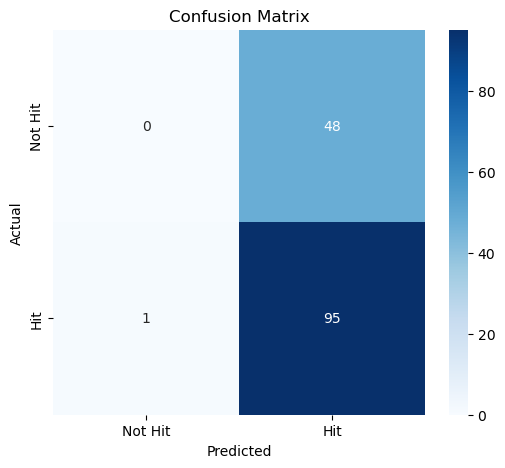

In [157]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Hit', 'Hit'],
            yticklabels=['Not Hit', 'Hit'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [158]:
from sklearn.metrics import roc_curve, auc


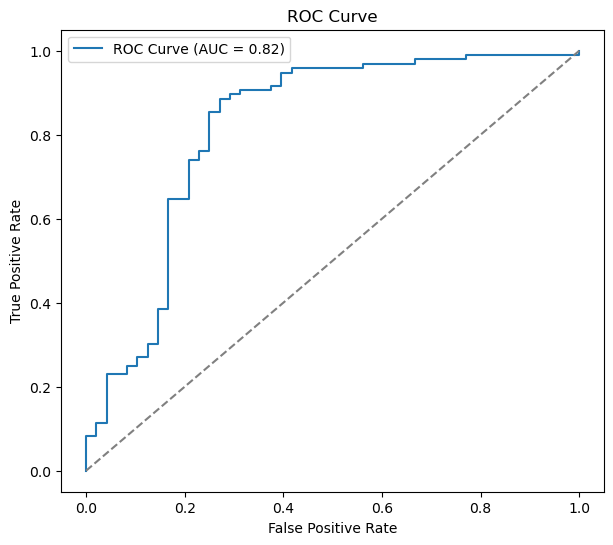

In [159]:

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')

plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

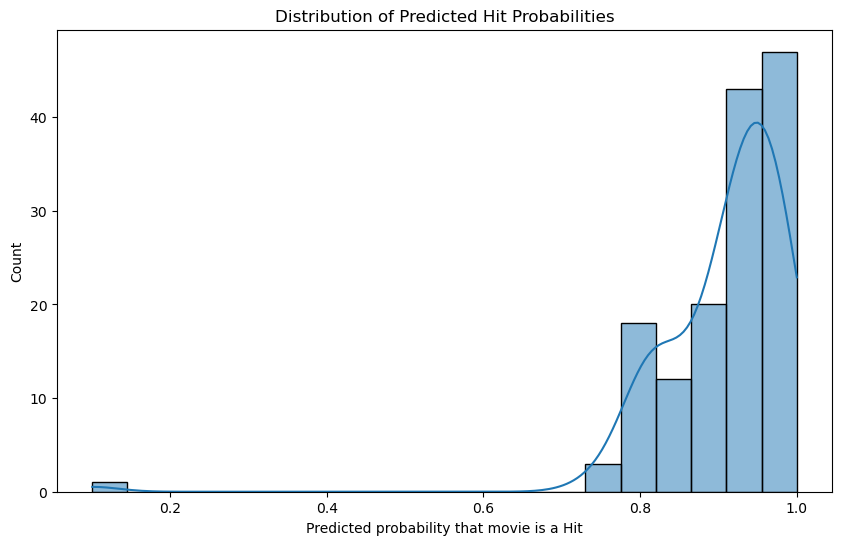

In [160]:
plt.figure(figsize=(10,6))
sns.histplot(y_prob, bins=20, kde=True)
plt.title("Distribution of Predicted Hit Probabilities")
plt.xlabel("Predicted probability that movie is a Hit")
plt.ylabel("Count")
plt.show()